# 【問題1】2×2マスのチェス盤の小麦の数

2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。

In [170]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [171]:
import numpy as np
small_board_ndarray = np.array(small_board_list).reshape(2, 2)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[[1 2]
 [4 8]]


# 【問題2】n×mマスへの拡張

n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [172]:
# チェス盤上の小麦粒数をカウントする関数
def grains_on_the_chess_board(n, m):
    grains = 1
    init_arr = []
    # 倍々するリストを作成
    for i in range(n):
        for j in range(m):
            init_arr.append(grains)
            grains *= 2
    # ndarrayに変換
    ndarr = np.array(init_arr).reshape(n, m)
    return ndarr


# 8*8マス指定
ans = grains_on_the_chess_board(8, 8)
print(ans)

[[1.00e+00 2.00e+00 4.00e+00 8.00e+00 1.60e+01 3.20e+01 6.40e+01 1.28e+02]
 [2.56e+02 5.12e+02 1.02e+03 2.05e+03 4.10e+03 8.19e+03 1.64e+04 3.28e+04]
 [6.55e+04 1.31e+05 2.62e+05 5.24e+05 1.05e+06 2.10e+06 4.19e+06 8.39e+06]
 [1.68e+07 3.36e+07 6.71e+07 1.34e+08 2.68e+08 5.37e+08 1.07e+09 2.15e+09]
 [4.29e+09 8.59e+09 1.72e+10 3.44e+10 6.87e+10 1.37e+11 2.75e+11 5.50e+11]
 [1.10e+12 2.20e+12 4.40e+12 8.80e+12 1.76e+13 3.52e+13 7.04e+13 1.41e+14]
 [2.81e+14 5.63e+14 1.13e+15 2.25e+15 4.50e+15 9.01e+15 1.80e+16 3.60e+16]
 [7.21e+16 1.44e+17 2.88e+17 5.76e+17 1.15e+18 2.31e+18 4.61e+18 9.22e+18]]


# 【問題3】小麦の数の合計

8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。


棒グラフはサンプルコードを用意しています。


《棒グラフのサンプルコード》



```import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,4), np.array([1, 2, 3]))
plt.show()
```

### ①まずは合計を求める

In [173]:
print("8*8マスの合計値は{}".format(np.sum(grains_on_the_chess_board(8, 8))))

8*8マスの合計値は1.8446744073709552e+19


### ②次に列ごとの平均値をmatplotlibでグラフにする

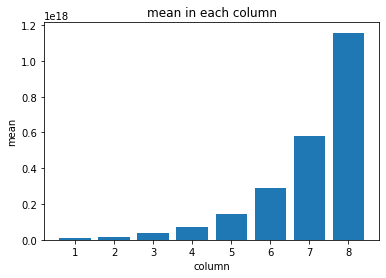

In [174]:
plt.xlabel("column")
plt.ylabel("mean")
plt.title("mean in each column")
left = [int(x+1) for x in range(ans.shape[0])] # グラフのX軸目盛、ansの列のlen
height = np.mean(ans, axis=0) # グラフの高さ(Y軸の目盛ではない)、ansの列毎の平均値
plt.bar(left, height)
plt.show()

# 【問題5】後半は前半の何倍か

チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [175]:
first = np.sum(ans[:4])
last = np.sum(ans[4:])

print("前半部分の合計値：{:,}".format(first))
print("後半部分の合計値：{:2e}".format(last))

前半部分の合計値：4,294,967,295.0
後半部分の合計値：1.844674e+19


In [176]:
baisu = last / first
print("後半は前半の{:,}倍です。".format(int(baisu)))

後半は前半の4,294,967,296倍です。


# 【問題6】他の計算方法によるn×mマスへの拡張

《サンプルコード（np.append()）》

```n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))```

《サンプルコード（ブロードキャスト）》

```n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))```

In [177]:
#　np.append版
def np_append(n, m):
    append_ndarray = np.array([1])
    for _ in range(n*m - 1):
        append_ndarray = np.append(append_ndarray, 2*(append_ndarray[-1])).astype(np.uint64)
    append_ndarray = append_ndarray.reshape((n,m))
    return append_ndarray

ans = np_append(8, 8)
print(("8*8マスの板に小麦を並べる（ndarray）：{}".format(ans)))
    

8*8マスの板に小麦を並べる（ndarray）：[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       7036874417

In [178]:
# ブロードキャスト版
def np_broadcast(n, m):
    tmp = np.arange(n*m)
    #print(tmp)
    broadcast_ndarray = 2**tmp
    broadcast_ndarray = broadcast_ndarray.reshape((n, m)).astype(np.uint64)
    return broadcast_ndarray

ans = np_broadcast(8, 8)
print(("8*8マスの板に小麦を並べる（ndarray）：{}".format(ans)))

8*8マスの板に小麦を並べる（ndarray）：[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       7036874417

# 【問題7】計算時間の比較

3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。

In [179]:
%%timeit


# 計測、pythonリスト版
# チェス盤上の小麦粒数をカウントする関数
def grains_on_the_chess_board(n, m):
    grains = 1
    init_arr = []
    # 倍々するリストを作成
    for i in range(n):
        for j in range(m):
            init_arr.append(grains)
            grains *= 2
    # ndarrayに変換
    ndarr = np.array(init_arr).reshape(n, m)
    return ndarr


# 8*8マス指定
ans = grains_on_the_chess_board(8, 8)

14.7 µs ± 400 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [180]:
%%timeit

# 計測、np.append版
#　np.append版
def np_append(n, m):
    append_ndarray = np.array([1])
    for _ in range(n*m - 1):
        append_ndarray = np.append(append_ndarray, 2*(append_ndarray[-1])).astype(np.uint64)
    append_ndarray = append_ndarray.reshape((n,m))
    return append_ndarray

ans = np_append(8, 8)

645 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [181]:
%%timeit

# 計測、ブロードキャスト版
# ブロードキャスト版
def np_broadcast(n, m):
    tmp = np.arange(n*m)
    #print(tmp)
    broadcast_ndarray = 2**tmp
    broadcast_ndarray = broadcast_ndarray.reshape((n, m)).astype(np.uint64)
    return broadcast_ndarray

ans = np_broadcast(8, 8)

3.81 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 計測時間のまとめ

複数回回してみて大きなブレがなかったので、最後に回した数値を記載する。

・pythonリスト版
15.7 µs ± 540 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

・np.append版
616 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

・ブロードキャスト版
3.54 µs ± 63.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


以上の結果から、処理速度は

### ブロードキャスト > pythonリスト > np.append

であることがわかった。

np.appendは毎回リストを読み込みに行っているのが大きな要因だと考察する。
逆にリストへのアクセスはappendだけで、値の計算は外でやったらどうなるか？

In [182]:
%%timeit

# 計測、np.append版
#　np.append版
def np_append(n, m):
    append_ndarray = np.array([])
    tmp = 1
    for _ in range(n*m):
        append_ndarray = np.append(append_ndarray, tmp).astype(np.uint64) # tmpを別で計算して代入
        tmp *= 2
    append_ndarray = append_ndarray.reshape((n,m))
    return append_ndarray

ans = np_append(8, 8)
#print(ans)

402 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### かかった時間

369 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

半分とは行かなかったが、3/5程度に収まった。
リストに頻繁にアクセスすると時間を喰う原因になりやすいようだ。